In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.utils import to_categorical  
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
from keras.models import save_model

In [2]:
# Reading the data (gestures images)
path = r"C:\Users\140541\Desktop\Prodigy Info Tech Internship Tasks\Hand Gesture Recognition" # Gestures Path
hand_gestures = ["01_palm", "02_l", "03_fist", "04_fist_moved", "05_thumb", "06_index", "07_ok", "08_palm_moved", "09_c", "10_down"]
dataset = [] # An empty list to hold the dictionaries for each gesture.
image_size = (150, 150)

for file in range(10): # Looping through the 10 files containing the gestures.
    file_data = os.path.join(path, f"{file:02d}")
    for gesture in hand_gestures: # Looping through the gestures files.
        gestures_img = os.path.join(file_data, gesture)
        if os.path.exists(gestures_img):
            for filename in os.listdir(gestures_img): # Looping through the images in each gestures file.
                if filename.endswith((".png", ".jpg")):
                    image_path = os.path.join(gestures_img, filename)
                    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                    if image is not None: # Checking if it's a valid image
                        resized_image = cv2.resize(image, image_size)
                        dataset.append({"gesture": gesture, "image": resized_image})

total_count = len(dataset)
print(f"total data count: {total_count}")

total data count: 20000


In [3]:
images = np.array([item['image'] for item in dataset])
labels = np.array([item['gesture'] for item in dataset])

images = np.array(images, dtype = 'float32')
labels = np.array(labels)
labels = labels.reshape(total_count, 1)
print(images)
print('====================')
print(labels)

[[[ 4.  4.  5. ...  2.  3.  4.]
  [ 5.  5.  5. ...  3.  2.  3.]
  [ 4.  6.  5. ...  4.  2.  4.]
  ...
  [ 5.  5.  5. ...  6.  5.  5.]
  [ 5.  4.  5. ...  5.  4.  4.]
  [ 4.  4.  5. ...  3. 12. 15.]]

 [[ 4.  3.  3. ...  3.  4.  2.]
  [ 4.  4.  3. ...  3.  4.  4.]
  [ 4.  4.  4. ...  3.  3.  3.]
  ...
  [ 6.  5.  5. ...  4.  5.  4.]
  [ 4.  7.  7. ...  4.  5.  4.]
  [ 5.  7.  5. ...  4. 12. 15.]]

 [[ 4.  3.  3. ...  3.  4.  2.]
  [ 4.  4.  3. ...  3.  4.  4.]
  [ 4.  4.  4. ...  3.  3.  3.]
  ...
  [ 6.  5.  5. ...  4.  5.  4.]
  [ 4.  7.  7. ...  4.  5.  4.]
  [ 5.  7.  5. ...  4. 12. 15.]]

 ...

 [[ 5.  6.  4. ...  3.  2.  3.]
  [ 5.  3.  4. ...  3.  3.  3.]
  [ 5.  4.  5. ...  3.  2.  4.]
  ...
  [ 4.  4.  4. ...  4.  4.  3.]
  [ 4.  5.  4. ...  4.  2.  2.]
  [ 4.  3.  4. ...  4. 10. 15.]]

 [[ 4.  3.  4. ...  3.  4.  2.]
  [ 4.  4.  5. ...  3.  3.  4.]
  [ 4.  4.  4. ...  3.  4.  4.]
  ...
  [ 4.  5.  4. ...  4.  4.  4.]
  [ 5.  3.  3. ...  3.  5.  3.]
  [ 4.  5.  4. ...  4. 12. 1

In [4]:
# Converting the labels to numerical representation
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [6]:
# CNN model
model = models.Sequential()
# 1st Layer
model.add(Conv2D(filters = 15, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (150, 150, 1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd layer
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(len(hand_gestures), activation = 'softmax'))

# Inialize the optimizer
optimizer = Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
# Compile the model
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 1, restore_best_weights = True)
# Train the model (training history)
history = model.fit(X_train, y_train, epochs = 3, batch_size = 250, validation_data = (X_test, y_test), callbacks = [early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/3


64/64 [==============================] - 226s 3s/step - loss: 49.4557 - accuracy: 0.5453 - val_loss: 0.3806 - val_accuracy: 0.9377
Epoch 2/3
64/64 [==============================] - 115s 2s/step - loss: 0.0805 - accuracy: 0.9784 - val_loss: 0.0560 - val_accuracy: 0.9918
Epoch 3/3
125/125 [==============================] - 41s 66ms/step - loss: 0.0335 - accuracy: 0.9952
Test Accuracy: 0.9952499866485596


In [7]:
# Plotting the learning curves
def plot_learning_curves(history):
    # The training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

    # The training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc = 'upper left')
    plt.show()

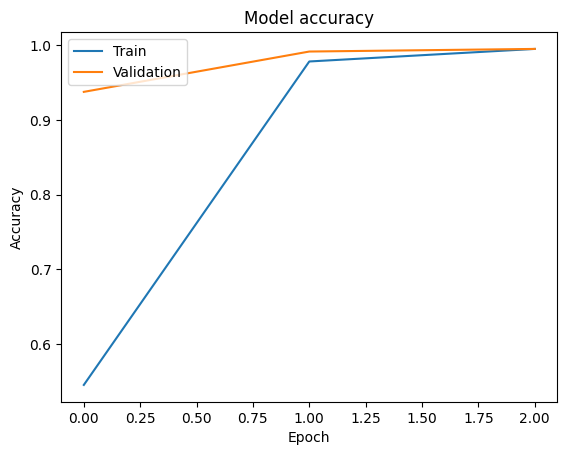

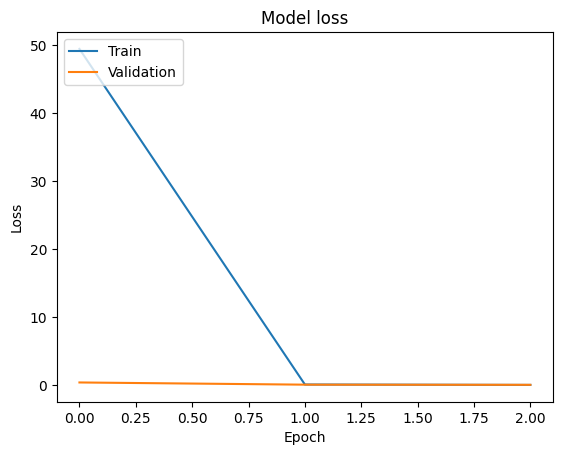

In [8]:
# Calling the function
plot_learning_curves(history)

In [9]:
#save the model
model.save('Hand Gesture Recognition.h5')

c:\Users\140541\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
